# Simplex method
<br>

# Z - 3x1 - 5x2 = 0
# x1 + y1 = 4
# 2x2 + y2 = 12
# 3x1 + 2x2 + y3 = 18

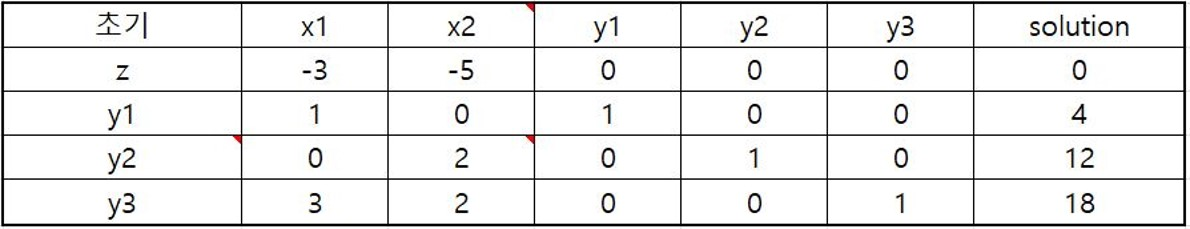

# Simplex method 알고리즘 과정(Maximize)

1. 첫 행에서 음수가 존재하면 실행
2. (음수가 존재하면) pivot 원소 선택. -> 열과 행이 결정되야함.<br>
    2.1 (pivot 열 결정) 절댓값이 가장 큰 음수 column 선택  
    2.2 (pivot 행 결정) 가장 작은 양수인 ratio row 선택
3. pivot row를 제외한 나머지 row에 대해서 모두 소거

4. 첫 행(목적함수 행)에 음수가 존재하지 않을 때 까지 반복
<br><br><br>

# 필요한 기능
따라서 코드로 구현해야 할 핵심 기능은 다음 3가지 뿐이다.

1. 첫 행에서 가장 큰 음수를 갖는 column 탐색
2. 해당 칼럼에서 가장 작은 ratio를 갖는 row 탐색
3. 가우스 소거

In [ ]:
def simplex_method(data_list, num_of_decision):   # 행렬과 결정변수를 파라미터로 갖는 함수 simplex_method(정의)
    m = -9999      # 처음에 첫 행(목적함수 계수)에 음수 존재 여부를 판단하기 위해 충분히 작은 m값 선언

    while(m < 0):              # 첫 행에 음수가 있으면 계속 반복

    # 1. 첫 행에서 가장 큰 음수를 갖는 column을 탐색

        object_function_row = data_list[0]
        pivot_col_index = Search_largest_negative(object_function_row)  # 첫 행에서 가장 작은 음수를 가진 col의 index 찾기
                          # 위 함수의 return값은 가장 작은 음수를 가진 열의 index값

    # 2. 해당 열에서 가장 작은 ratio를 갖는 row를 탐색(row의 index(번호)를 탐색)

        pivot_row_index = Search_smallest_ratio(data_list, pivot_col_index)  # 피벗 열에서 모든 행의 ratio를 계산하여 가장 작은 양수의 ratio를 갖는 row의 index 찾기
                          # 위 함수의 return 값은 그때의 row index값

    # 3. 가우스 소거

        data_list = Gaussian_elimination(data_list, pivot_row_index, pivot_col_index)   # 피벗 값을 찾았으므로 가우스 소거 진행

        m = min(data_list[0])                # iteration 진행 후 첫 행에서 가장 작은 수 받기. (*이때, 음수가 없으면 반복 종료*)

    # 4. 행렬 및 Z, 결정변수 값 출력

    all_print(data_list, num_of_decision)     # while문 종료 후  최종 Maximize Z값과 변수 x1, x2 값과  최종 행렬 데이터(data_list) 출력

#     return data_list   # 가우스 소거가 완료된 행렬과 Maximize Z값 return

In [ ]:
#1.  첫 행에서 가장 큰 음수를 갖는 column을 탐색

def Search_largest_negative(object_funcion_row):      # 첫번째 행(목적함수 계수 행)을 파라미터로 받으면
    min_ = min(object_funcion_row)                         # object_funcion_row에서 최솟값 = min_라 함
    return object_funcion_row.index(min_)            # 첫번째 행(목적함수 계수 행)에서 가장 작은 값을 갖는 열의 index를 반환

In [ ]:
#2. 해당 열(피벗 열)에서 가장 작은 ratio를 갖는 row(의 index)를 탐색

def Search_smallest_ratio(data_list, pivot_col_index):   # data_list와 pivot_col_index(위에서 구한 피벗 열의 index값)을 파라미터로 받는 함수를 정의
    min_ratio = 9999                                    # 나중에 ratio를 비교하기 위해 min_ratio를 충분히 큰 수로 설정
    pivot_row_index = 0                                # pivot_row_index를 찾기 위해 선언
    num_of_row = len(data_list)                       # 행렬의 행 개수

    for i in range(1,num_of_row):                     # 0번째 행은 목적함수이므로 1번 행부터 마지막 행까지 반복
        i_row_list = data_list[i]                     # i번째 행 리스트를 저장

        if data_list[i][pivot_col_index] != 0:       # pivot 열의 값이 0이면 0으로 나누게 되므로 오류가 나기 때문에 0이 아닌 값으로 조건 설정
            solution = i_row_list[-1]                # solution 값은 리스트의 마지막 값이므로 [-1]로 지정
            ratio = solution / i_row_list[pivot_col_index]

            if (ratio < min_ratio) and (ratio > 0):   # ratio중에 양수이면서 가장 작은 값을 갖는 열을 탐색
                min_ratio = ratio
                pivot_row_index = i

    return pivot_row_index

In [ ]:
# 3. 가우스 소거 후 새로운 data_list 도출

def Gaussian_elimination(data_list, pivot_row_index, pivot_col_index):
    # pivot이 속한 자신의 행을 pivot 값으로 나눈다.
    pivot = data_list[pivot_row_index][pivot_col_index]      # 피벗 값은 행렬[피벗행 인덱스][피벗열 인덱스]

    pivot_row = data_list[pivot_row_index]           # 피벗 행 리스트를 정함
    for i in range(len(pivot_row)):                 # 피벗 행 개수만큼 반복
        pivot_row[i] = pivot_row[i]/pivot           # 새로운 피벗 행 리스트의 i번째 값 = 기존 피벗 행 리스트의 i번째 값 / 피벗 값

    # pivot 열을 제외한 나머지 계수 0으로 소거
    num_of_row = len(data_list)               # 행 개수
    num_of_col = len(data_list[0])           # 열 개수

    for row_index in range(num_of_row):
        if (data_list[row_index][pivot_col_index]) != 0 and (row_index != pivot_row_index):   # 각 행에 pivot_col의 값이 0인 행은 계산할 필요 없고, pivot행 또한 자기 자신의 행이므로 제외한다.
            multiple = data_list[row_index][pivot_col_index]                                  # 소거하기 위한 피벗 값에 대한 배수
            for col_index in range(num_of_col):                                              # 모든 열에 대해 소거를 하나씩 진행
                data_list[row_index][col_index] = data_list[row_index][col_index] - multiple * data_list[pivot_row_index][col_index] # 가우스 소거법

    return data_list

In [ ]:
def all_print(data_list, num_of_decision):

    print(f"Maximize Z : {data_list[0][-1]}")    # f string 이용 -> f" {}": 중괄호에 있는 값이 자동으로 바뀜

    for col in range(num_of_decision):         # 결정변수의 개수까지 반복
        for row in range(1, len(data_list)):   # 목적함수 행 제외한 모든 행 반복
            if (data_list[row][col] == 1.0):
                x = data_list[row][-1]         # 이때의 x는 위 조건을 만족하는 행의 solution 값
                print(f"x_{col+1} : {x}")
                break                         # 결정변수가 모두 출력됐다면 break

    # 행렬 출력
    for row in range(len(data_list)):
        for col in range(len(data_list[0])):
            print(round(data_list[row][col],3), end = "\t")   # round함수를 이용해 소수점 3째자리까지 반올림
        print()

In [ ]:
input_data = [
    [-3, -5, 0, 0, 0, 0],
    [1, 0, 1, 0, 0, 4],
    [0, 2, 0, 1, 0, 12],
    [3, 2, 0, 0, 1, 18]
]

simplex_method(input_data, 2)

Maximize Z : 36.0
x_1 : 2.0
x_2 : 6.0
0.0	0.0	0.0	1.5	1.0	36.0	
0.0	0.0	1.0	0.333	-0.333	2.0	
0.0	1.0	0.0	0.5	0.0	6.0	
1.0	0.0	0.0	-0.333	0.333	2.0	
